# Importación de librerias

In [96]:
#Sección de librerias
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm,uniform,expon,poisson


# Limpieza de los datos 

In [2]:
#Sección de carga de datasets
file1 = 'RunningData.csv'
file2= 'Accidentalidad_en_Barranquilla.xls'

In [3]:
#Dataframes
running = pd.read_csv(file1)
accbaq = pd.read_excel(file2)

In [4]:
#Sacamos los datos necesarios para el análisis
distancia = running['Distance (km)']
accdate = accbaq[['FECHA_ACCIDENTE','CANTIDAD_ACCIDENTES']]

# Running Data Analysis

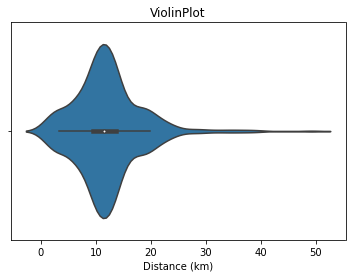

In [87]:
sns.violinplot(running["Distance (km)"]).set(
    title = "ViolinPlot")
plt.show()

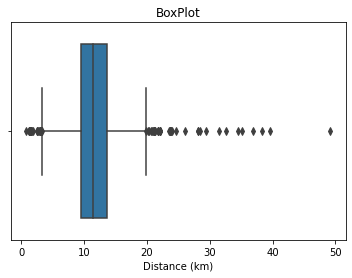

In [89]:
sns.boxplot(running["Distance (km)"]).set(
    title = "BoxPlot")
plt.show()

<p>Con un primer vistazo podemos darnos cuenta que hay una cantidad considerable de outlayers y que además, la media de los datos se encuentra aproximadamente entre 11 y 12</p>

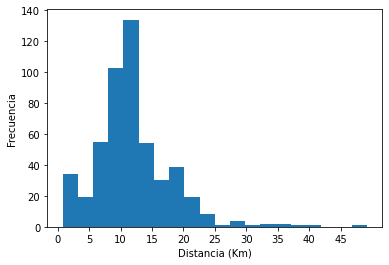

In [43]:
plt.hist(distancia,bins=20)
plt.xlabel("Distancia (Km)")
plt.ylabel("Frecuencia")
plt.xticks(np.arange(0,50,5))
plt.show()

In [12]:
distancia.describe()

count    508.000000
mean      12.041732
std        6.064125
min        0.760000
25%        9.495000
50%       11.460000
75%       13.642500
max       49.180000
Name: Distance (km), dtype: float64

<p>Con un primer vistazo a los datos podemos darnos una idea de las probabilidades para cada una de las pregunta. Podemos observar que la frecuencia de personas que recorren 10km es mayor que las que recorren 15km. Además, también se podría decir que los datos tienen forma de una distribución normal</p>

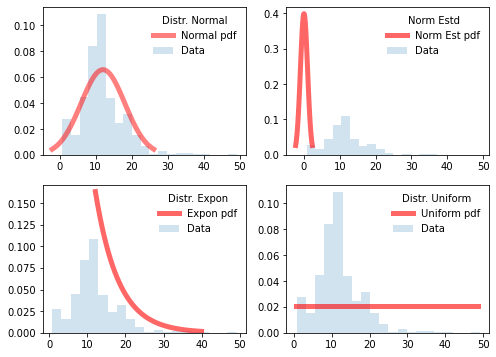

In [85]:
#Declarando los gráficos
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(8,6)
mu, sign = distancia.mean(),distancia.std()
x_rv = distancia

#Distribución Normal
xn = np.linspace(norm.ppf(0.01, mu, sig), norm.ppf(0.99, mu, sig))
ax[0,0].plot(xn, norm.pdf(xn, mu, sig), 'r-', lw=5, alpha=0.5, label='Normal pdf')
ax[0,0].hist(x_rv,bins=20, density=True, histtype='stepfilled', alpha=0.2, label='Data')
ax[0,0].legend(loc='best', frameon=False,title='Distr. Normal')


#Distribución Normal Estandar
xne = np.linspace(norm.ppf(0.01), norm.ppf(0.99),100)
ax[0,1].plot(xne, norm.pdf(xne), 'r-', lw=5, alpha=0.6, label='Norm Est pdf')
ax[0,1].hist(x_rv, bins = 20,density=True, histtype='stepfilled', alpha=0.2, label ='Data')
ax[0,1].legend(loc='best', frameon=False, title ='Norm Estd')


#Distribución Exponencial
xe = np.linspace(expon.ppf(0.01, mu, sig), expon.ppf(0.99, mu, sig))
ax[1,0].plot(xe, expon.pdf(xe, mu, sig), 'r-', lw=5, alpha=0.6, label='Expon pdf')
ax[1,0].hist(x_rv, bins=20 , density=True, histtype='stepfilled', alpha=0.2, label ='Data')
ax[1,0].legend(loc='best', frameon=False, title='Distr. Expon')


#Distribución Uniforme
xu = np.linspace(uniform.ppf(0.01,scale=distancia.max()),uniform.ppf(0.99,scale=distancia.max()))
ax[1,1].plot(xu, uniform.pdf(xu,scale=distancia.max()),'r-', lw=5, alpha=0.6, label='Uniform pdf')
x_rvu = distancia
ax[1,1].hist(x_rv,bins=20, density=True, histtype='stepfilled', alpha=0.2,label ='Data')
ax[1,1].legend(loc='best', frameon=False,title='Distr. Uniform')
plt.show()



<p>Se puede observar que lo especulado anteriormente se corrobora comparando las diferentes distrubciones continuas. La distribución normal es la que mejor se ajusta a los datos. </p>

In [92]:
#Calculamos la probabilidad de recorrer una distancia de 10km 
norm.cdf(10.001,mu,sig) - norm.cdf(9.999,mu,sig)

0.00012432430184056154

<p>Al ser una variable aleatoria de naturaleza continua, la probabilidad en un punto tiende a cero. Lo que se hace es tomar diferenciales pequeños con el fin de no alejarse mucho del punto, para poder hacer una aproximación de la probabilidad en el punto. </p>

In [97]:
#Calculamos la probabilidad de recorrer una distancia mayor a 15km
1 - norm(mu, sig).cdf(15)

0.3128347980883608

<p> Para calcular esta probabilidad, primero se calcula la acumulada hasta 15 y luego le quitamos el complemento con el fin de calcular los mayores a ese punto </p>

<strong>Conclusiones</strong>


# Vehicle Accident Analysis

In [37]:
accxday = accdate.groupby(['FECHA_ACCIDENTE']).count()
accxday

,CANTIDAD_ACCIDENTES
FECHA_ACCIDENTE,
2015-01-01,10
2015-01-02,13
2015-01-03,11
2015-01-04,7
2015-01-05,14
...,...
2020-05-26,10
2020-05-27,2
2020-05-28,12


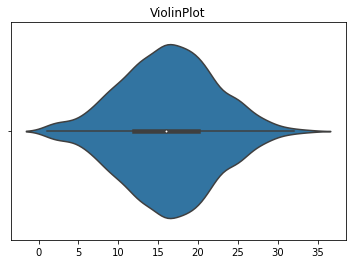

In [95]:
sns.violinplot(accxday).set(
    title = "ViolinPlot")
plt.show()

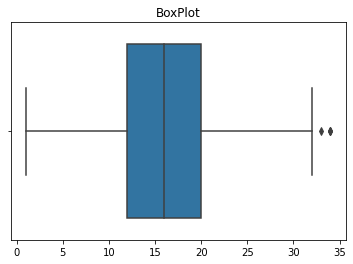

In [94]:
sns.boxplot(accxday).set(
    title = "BoxPlot")
plt.show()

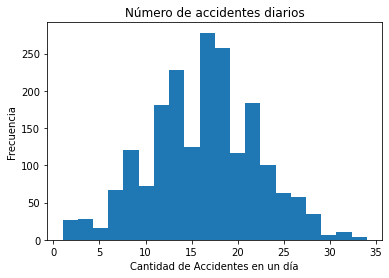

In [84]:
plt.hist(accxday['CANTIDAD_ACCIDENTES'],bins=20) 
plt.title('Número de accidentes diarios')
plt.xlabel('Cantidad de Accidentes en un día')
plt.ylabel('Frecuencia')
plt.show()

<p>A primera vista, el histograma nos muestra que los datos tienen un comportamiento que se ajusta a una distribución de Poisson. Analicemos otros detalles para ver si esto es verdad.</p>

In [39]:
accxday.describe()

,CANTIDAD_ACCIDENTES
count,1974.000000
mean,16.269504
std,5.901138
min,1.000000
25%,12.000000
50%,16.000000
75%,20.000000
max,34.000000


<p>Si recordamos los parametros de una distribución de Poisson $ P(n,\lambda)$, donde $\lambda = \mu$, es decir, es igual a la media. Si recordamos, cuando la media de un conjunto de datos que presentan una distribución Poisson es mayor o igual que 10, esto es, $\mu = \lambda \geq 10$, es posible aproximar esta distribución a una distribución Normal</p> 

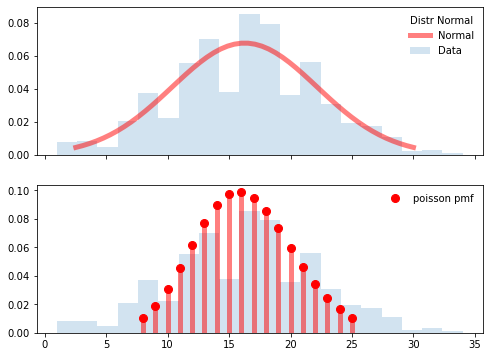

In [140]:
fig, (ax2, ax3) = plt.subplots(2, sharex=True)
fig.set_size_inches(8,6)
mu1, sig1 = accxday['CANTIDAD_ACCIDENTES'].mean(),accxday['CANTIDAD_ACCIDENTES'].std()
x_rv = accxday['CANTIDAD_ACCIDENTES']

#Distribución Normal
x = np.linspace(norm.ppf(0.01, mu1, sig1), norm.ppf(0.99, mu1, sig1))
ax2.plot(x, norm.pdf(x, mu1, sig1), 'r-', lw=5, alpha=0.5, label='Normal')
ax2.hist(x_rv,bins=20, density=True, histtype='stepfilled', alpha=0.2, label='Data')
ax2.legend(loc='best', frameon=False,title='Distr Normal')

#Distribución Poisson
xp = np.arange(poisson.ppf(0.01, mu1), poisson.ppf(0.99, mu1))
ax3.plot(xp, poisson.pmf(xp, mu1), 'ro', ms=8, label='poisson pmf')
ax3.vlines(xp, 0, poisson.pmf(xp, mu1), colors='r', lw=5, alpha=0.5)
ax3.hist(x_rv, bins=20 ,density=True, alpha=0.2,)
ax3.legend(loc='best', frameon=False)
plt.show()

In [137]:
norm(mu, sig).cdf(10)

0.36817517185325827

In [42]:
1 - norm(mu1, sig1).cdf(15)

0.5851664727945947

In [139]:
poisson(mu,sig).cdf(10)

0.0022190886916079707